# Baseline Model: TF-IDF + Logistic Regression

This notebook implements a baseline model for Swahili SMS scam detection using TF-IDF vectorization and Logistic Regression, optimized for class imbalance as part of the Model Development section (3 Marks). The steps include data loading, vectorization, model training, hyperparameter tuning, and evaluation with F1-score and confusion matrix.

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
data = pd.read_csv('../data/processed_bongo_scam.csv')
print("Preprocessed data sample:")
print(data[['Category', 'cleaned_sms']].head())

Preprocessed data sample:
  Category                                        cleaned_sms
0    trust                   nipigie baada saa moja tafadhali
1     scam  naomba unitumie iyo hela kwenye namba airtel j...
2     scam  karibu freemason utimize ndoto biashara kilimo...
3    trust               watoto wanapenda zawadi ulizowaletea
4     scam  iyo pesa itume kwenye namba jina italeta magom...


In [4]:
# Split data
X = data['cleaned_sms']
y = data['Category'].map({'trust': 0, 'scam': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [6]:
# Baseline Logistic Regression
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)

# Initial evaluation
f1 = f1_score(y_test, y_pred)
print(f'Initial F1-Score: {f1:.4f}')

Initial F1-Score: 1.0000


In [7]:
# Hyperparameter optimization
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train_tfidf, y_train)
best_lr = grid.best_estimator_
print(f'Best C: {grid.best_params_["C"]}')

Best C: 10


Optimized F1-Score: 1.0000


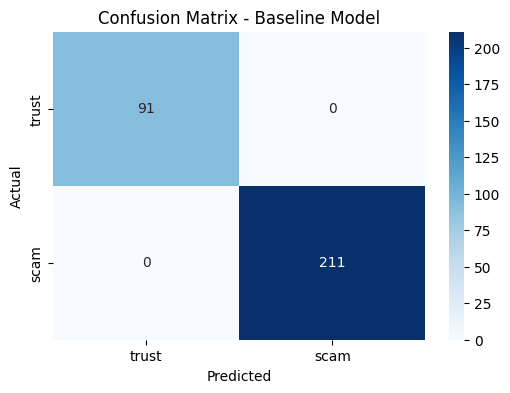

In [8]:
# Final evaluation
y_pred_best = best_lr.predict(X_test_tfidf)
f1_best = f1_score(y_test, y_pred_best)
print(f'Optimized F1-Score: {f1_best:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['trust', 'scam'], yticklabels=['trust', 'scam'])
plt.title('Confusion Matrix - Baseline Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../reports/visualizations/baseline_confusion_matrix.png')
plt.show()